# Red-Black Search Tree

Red-black search tree.

In [1]:
import numpy as np # For testing only
import matplotlib.pyplot as plt
import networkx as nx

Call write with key 8 on node 9
Called balance on node 9
Call write with key 7 on node 9
Call write with key 7 on node 8
Called balance on node 8
Called balance on node 9
Called rotation right on node 9
Call write with key 6 on node 8
Call write with key 6 on node 7
Called balance on node 7
Called balance on node 8
Call write with key 5 on node 8
Call write with key 5 on node 7
Call write with key 5 on node 6
Called balance on node 6
Called balance on node 7
Called rotation right on node 7
Called balance on node 8
Call write with key 4 on node 8
Call write with key 4 on node 6
Call write with key 4 on node 5
Called balance on node 5
Called balance on node 6
Called balance on node 8
Call write with key 3 on node 8
Call write with key 3 on node 6
Call write with key 3 on node 5
Call write with key 3 on node 4
Called balance on node 4
Called balance on node 5
Called rotation right on node 5
Called balance on node 6
Called balance on node 8
Called rotation right on node 8
Call write with k

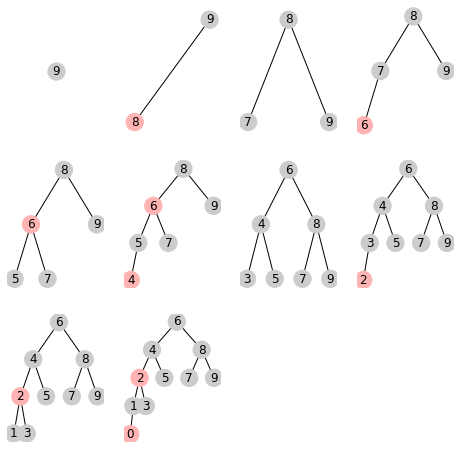

In [95]:
class Node:
    """BST node."""
    def __init__(self, key, value, parent=None, red=False):
        self.key = key
        self.value = value
        self.left =  None # Left and right branches
        self.right = None
        self.parent = parent
        self.is_red = red
        
    def __str__(self):
        return f"{self.key}:{self.value}({str(self.left)})({str(self.right)})"
    
    def write(self,key,value):
        print(f'Call write with key {key} on node {self.key}')
        if key==self.key:           self.value = value
        elif key<self.key:
            if self.left is None:   self.left =  Node(key, value, parent=self, red=True)
            else:                   self.left =  self.left.write(key,value)
            #self.left = self.left.balance()
        else:
            if self.right is None:  self.right = Node(key, value, parent=self, red=True)
            else:                   self.right = self.right.write(key,value)
            #self.right = self.right.balance()
        self.fix_parents()
        return self.balance()
                
    def read(self,key):
        if key==self.key:      return self.value
        if key< self.key:
            if self.left is None: return None
            return self.left.read(key)
        else:
            if self.right is None: return None
            return self.right.read(key)
        
    def delete(self,key):
        if key==self.key: return self._remove()
        if key< self.key:
            if self.left is not None: self.left = self.left.delete(key)
        else:
            if self.right is not None: self.right = self.right.delete(key)
        return self.balance()
    
    def _remove(self):
        """Helper that actually deletes a given node."""
        if self.left is None and self.right is None: return None
        if self.left is None: 
            self.right.parent = self.parent
            return self.right
        if self.right is None: 
            self.left.parent = self.parent
            return self.left
        # Now we are in "both kids exist" branch. Look for successor.
        succ = self.right
        while succ.left is not None:
            succ = succ.left
        succ.key, self.key = self.key, succ.key         # Swap keys and values (next row)
        succ.value, self.value = self.value, succ.value # succ is now doomed
        if succ.parent == self: # If succ==self.right
            succ.parent.right = succ.right            
        else:
            succ.parent.left = succ.right
        if succ.right is not None:
            succ.right.parent = succ.parent
        return self
    
    def balance(self):
        """Balances current node (and its kids)"""
        print(f'Called balance on node {self.key}')
        if (self.right is not None and self.right.is_red and
            (self.left is None or not self.left.is_red)):
            self = self._rotate(direction='left')
        if (self.left is not None and self.left.is_red and 
            self.left.left is not None and self.left.left.is_red):
            self = self._rotate(direction='right')
        if (self.left is not None and self.right is not None and
            self.left.is_red and self.right.is_red):
            # Flip edge colors
            self.left.is_red = False
            self.right.is_red = False
            self.is_red = not self.is_red
        #print(f'Node {self.key} isred is {self.is_red}, and has a parent of {self.parent}')
        if self.parent is None: # root
            self.is_red = False
        return self
    
    def fix_parents(self, nodes=None):
        if nodes is None:
            nodes = [self]
        for node in nodes:
            if node.right is not None:
                node.right.parent = node
            if node.left is not None:
                node.left.parent = node
    
    def _rotate(self, direction):
        # We assume that all checks for rotateableness are passed
        print(f'Called rotation {direction} on node {self.key}')
        if direction=='left':
            # Is called when b is to the right from a, and red
            a = self
            b = self.right
            a.right, b.left, b.parent, a.parent = b.left, a, a.parent, b
            b.is_red = a.is_red
            a.is_red = True
            self.fix_parents([a,b])
            return b
        if direction=='right':
            # Is called when a is red, and its left is also red
            b = self
            a = self.left
            b.left, a.right, a.parent, b.parent = a.right, b, b.parent, a
            a.is_red = b.is_red
            b.is_red = True
            self.fix_parents([a,b])
            return a    

class Tree:
    def __init__(self):
        self.root = None
        
    def __str__(self):
        return str(self.root)
    
    def write(self,key,value):
        if self.root==None: self.root = Node(key,value) # Special case for the very first node
        else: self.root = self.root.write(key,value)
            
    def read(self,key):
        if self.root==None: return None
        return self.root.read(key)
    
    def delete(self,key):
        self.root = self.root.delete(key)
        
    def plot(self):
        RED = [1, 0.7, 0.7]
        BLACK = [0.8, 0.8, 0.8]
        colors = []
        g = nx.Graph()
        q = [(None, self.root, 0,0)]
        shifts = {}
        while q:
            parent,node,level,shift = q.pop(0)
            g.add_node(node.key)
            if node.is_red: colors.append(RED)
            else: colors.append(BLACK)
            shifts[node.key] = [shift, -level]
            if parent is not None:                g.add_edge(parent.key, node.key)
            if node.left is not None:             q.append((node, node.left,  level+1, shift-1/(2**level)))
            if node.right is not None:            q.append((node, node.right, level+1, shift+1/(2**level)))
        # fig = plt.figure(figsize=(2,2))
        pos = nx.planar_layout(g)
        pos = {key:shifts[key] for key,val in pos.items()}
        nx.draw(g, pos, node_color=colors, with_labels=True)
        
    def validate_parents(self, node=None):
        """Utility function to make sure parents are correct."""
        if node is None: node = self.root
        if node.right is not None:
            if node.right.parent != node:
                print(f'Node {node.right.value} reports {node.right.parent} as a parent; should be {node}')
            self.validate_parents(node.right)
        if node.left is not None:
            if node.left.parent != node:
                print(f'Node {node.left.value} reports {node.left.parent} as a parent; should be {node}')
            self.validate_parents(node.left)
            
# Test
np.random.seed(2)
t = Tree()
#values = [4,6,8,2,1,0,-1]
values = [9,8,7,6,5,4,3,2,1,0]
plt.figure(figsize=(8,8))
for i in range(len(values)):
    plt.subplot(3, 1+ len(values) // 3, 1+i)
    t.write(values[i], str(values[i]))
    #print(t)
    t.plot()
    #t.validate_parents()

Called balance on node 4
Called balance on node 6
Called balance on node 2
Called balance on node 4
Called rotation right on node 4
Called balance on node 6
Called balance on node 2
Called balance on node 7


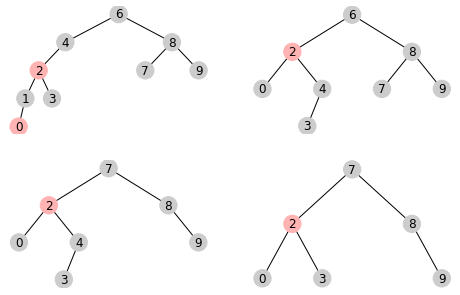

In [96]:
values = [5,1,6,4]
plt.figure(figsize=(8,8))
for i in range(len(values)):
    plt.subplot(3, 1+ len(values) // 3, 1+i)
    t.delete(values[i])
    #print(t)
    t.plot()
    #t.validate_parents()